In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/client.zip' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/imposter.zip' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/imposter.txt' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/client.txt' './'

In [ ]:
!wget "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"

--2021-05-28 12:21:53--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  24.4MB/s    in 2.5s    

2021-05-28 12:21:56 (24.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bzip2 -d "shape_predictor_68_face_landmarks.dat.bz2"

In [ ]:
!unzip 'imposter.zip'

Streaming output truncated to the last 5000 lines.
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test29.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test49.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test73.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test46.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test3.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test4.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test37.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test71.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test58.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test39.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test18.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test78.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test8.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test26.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test24.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test17.jpg  
  inflating: imposter/Vm_NT_5s_wg_E_23_138/test48.jpg  


In [ ]:
!unzip client.zip

Streaming output truncated to the last 5000 lines.
  inflating: client/G_NT_5s_wg_E_9_7/test45.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test29.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test49.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test73.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test46.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test3.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test4.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test37.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test71.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test58.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test39.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test18.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test78.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test88.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test8.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test26.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test24.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test17.jpg  
  inflating: client/G_NT_5s_wg_E_9_7/test48.jpg  
  

In [ ]:
import cv2
import dlib
import numpy as np
import os
from imutils import paths
import pickle
import random
from scipy.stats import norm
INPUT_SIZE = 112


In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
client_dataset = {}
for name in os.listdir('/content/data_rose/client'):
    client_dataset[name] = []

# imagePaths = list(paths.list_images('/content/data_rose/client'))
imagePaths = list(map(lambda x: x.rstrip(),open('client.txt').readlines()))
num_of_images = len(imagePaths)
for(i, data) in enumerate(imagePaths):
    print(data)
    print(f'Processing image {i}/{num_of_images}')
    label = data.split('/')[-2]
    img = dlib.load_rgb_image(data)
    dets = detector(img)
    for d in dets:
        shape = predictor(img, d)
        temp = dlib.get_face_chip(img, shape, size=INPUT_SIZE)
        # temp = temp.astype('float32')
        # standardize pixel values across channels (global)
        # mean, std = temp.mean(), temp.std()
        # temp = (temp - mean) / std
        # client_dataset[label].append(temp.reshape(1, INPUT_SIZE, INPUT_SIZE, 3))
        client_dataset[label].append(temp)

Streaming output truncated to the last 5000 lines.
/content/data_rose/client/G_NT_5s_wg_E_3_9/test48.jpg
Processing image 14478/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test49.jpg
Processing image 14479/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test50.jpg
Processing image 14480/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test51.jpg
Processing image 14481/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test52.jpg
Processing image 14482/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test53.jpg
Processing image 14483/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test54.jpg
Processing image 14484/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test55.jpg
Processing image 14485/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test56.jpg
Processing image 14486/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test57.jpg
Processing image 14487/16978
/content/data_rose/client/G_NT_5s_wg_E_3_9/test58.jpg
Processing image 14488/16978
/content/data_rose/client/G_NT_5s_wg

In [ ]:
X_5 = []
X_10 = []
X_15 = []
X_20 = []
for (key, values) in client_dataset.items():
  for i in range(len(values)):
    if len(values) < 20:
      print('Not valid')
      break
    if i + 19 > len(values) - 1 :
      break
    else:
      old = values[i][...,::-1]
      new_5 = values[i+4][...,::-1]
      new_10 = values[i+9][...,::-1]
      new_15 = values[i+14][...,::-1]
      new_20 = values[i+19][...,::-1]
      # print(old.shape)
      # old_flip = cv2.flip(old, 1)
      # new_5_flip = cv2.flip(new_5, 1)
      # new_10_flip = cv2.flip(new_10, 1)
      # new_15_flip = cv2.flip(new_15, 1)
      # new_20_flip = cv2.flip(new_20, 1)
      old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
      # old_flip_gray = cv2.cvtColor(old_flip, cv2.COLOR_BGR2GRAY)
      new_5_gray = cv2.cvtColor(new_5, cv2.COLOR_BGR2GRAY)
      # new_5_flip_gray = cv2.cvtColor(new_5_flip, cv2.COLOR_BGR2GRAY)
      new_10_gray = cv2.cvtColor(new_10, cv2.COLOR_BGR2GRAY)
      # new_10_flip_gray = cv2.cvtColor(new_10_flip, cv2.COLOR_BGR2GRAY)
      new_15_gray = cv2.cvtColor(new_15, cv2.COLOR_BGR2GRAY)
      # new_15_flip_gray = cv2.cvtColor(new_15_flip, cv2.COLOR_BGR2GRAY)
      new_20_gray = cv2.cvtColor(new_20, cv2.COLOR_BGR2GRAY)
      # new_20_flip_gray = cv2.cvtColor(new_20_flip, cv2.COLOR_BGR2GRAY)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_5_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_5_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_5.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_10_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_10_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_10.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_15_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_15_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_15.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_20_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_20_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_20.append(flow)

In [ ]:
del client_dataset

In [ ]:
X_5 = np.array(X_5)
X_10 = np.array(X_10)
X_15 = np.array(X_15)
X_20 = np.array(X_20)
X_5.shape, X_10.shape, X_15.shape, X_20.shape

((13377, 112, 112, 2),
 (13377, 112, 112, 2),
 (13377, 112, 112, 2),
 (13377, 112, 112, 2))

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
imposter_dataset = {}
for name in os.listdir('/content/data_rose/imposter'):
    imposter_dataset[name] = []

# imagePaths = list(paths.list_images('/content/data_rose/imposter'))
imagePaths = list(map(lambda x: x.rstrip(),open('imposter.txt').readlines()))
num_of_images = len(imagePaths)
for(i, data) in enumerate(imagePaths):
    print(data)
    print(f'Processing image {i}/{num_of_images}')
    label = data.split('/')[-2]
    img = dlib.load_rgb_image(data)
    dets = detector(img)
    for d in dets:
        shape = predictor(img, d)
        temp = dlib.get_face_chip(img, shape, size=INPUT_SIZE)
        # temp = temp.astype('float32')
        # standardize pixel values across channels (global)
        # mean, std = temp.mean(), temp.std()
        # temp = (temp - mean) / std
        # imposter_dataset[label].append(temp.reshape(1, INPUT_SIZE, INPUT_SIZE, 3))
        imposter_dataset[label].append(temp)

Streaming output truncated to the last 5000 lines.
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test49.jpg
Processing image 23127/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test50.jpg
Processing image 23128/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test51.jpg
Processing image 23129/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test52.jpg
Processing image 23130/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test53.jpg
Processing image 23131/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test54.jpg
Processing image 23132/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test55.jpg
Processing image 23133/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test56.jpg
Processing image 23134/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test57.jpg
Processing image 23135/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test58.jpg
Processing image 23136/25627
/content/data_rose/imposter/Vm_NT_5s_wg_E_16_163/test59.jpg

In [ ]:
X_5_imposter = []
X_10_imposter = []
X_15_imposter = []
X_20_imposter = []
for (key, values) in imposter_dataset.items():
  for i in range(len(values)):
    if len(values) < 20:
      print('Not valid')
      break
    if i + 19 > len(values) - 1 :
      break
    else:
      old = values[i][...,::-1]
      new_5 = values[i+4][...,::-1]
      new_10 = values[i+9][...,::-1]
      new_15 = values[i+14][...,::-1]
      new_20 = values[i+19][...,::-1]
      # print(old.shape)
      # old_flip = cv2.flip(old, 1)
      # new_5_flip = cv2.flip(new_5, 1)
      # new_10_flip = cv2.flip(new_10, 1)
      # new_15_flip = cv2.flip(new_15, 1)
      # new_20_flip = cv2.flip(new_20, 1)
      old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
      # old_flip_gray = cv2.cvtColor(old_flip, cv2.COLOR_BGR2GRAY)
      new_5_gray = cv2.cvtColor(new_5, cv2.COLOR_BGR2GRAY)
      # new_5_flip_gray = cv2.cvtColor(new_5_flip, cv2.COLOR_BGR2GRAY)
      new_10_gray = cv2.cvtColor(new_10, cv2.COLOR_BGR2GRAY)
      # new_10_flip_gray = cv2.cvtColor(new_10_flip, cv2.COLOR_BGR2GRAY)
      new_15_gray = cv2.cvtColor(new_15, cv2.COLOR_BGR2GRAY)
      # new_15_flip_gray = cv2.cvtColor(new_15_flip, cv2.COLOR_BGR2GRAY)
      new_20_gray = cv2.cvtColor(new_20, cv2.COLOR_BGR2GRAY)
      # new_20_flip_gray = cv2.cvtColor(new_20_flip, cv2.COLOR_BGR2GRAY)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_5_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5_imposter.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_5_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_5_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_10_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10_imposter.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_10_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_10_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_15_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15_imposter.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_15_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_15_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_20_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20_imposter.append(flow)
      # flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_20_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      # X_20_imposter.append(flow)

Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid
Not valid


In [ ]:
del imposter_dataset

In [ ]:
X_5_imposter = np.array(X_5_imposter)
X_10_imposter = np.array(X_10_imposter)
X_15_imposter = np.array(X_15_imposter)
X_20_imposter = np.array(X_20_imposter)
X_5_imposter.shape, X_10_imposter.shape, X_15_imposter.shape, X_20_imposter.shape

((17247, 112, 112, 2),
 (17247, 112, 112, 2),
 (17247, 112, 112, 2),
 (17247, 112, 112, 2))

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
X = np.array(list(zip(X_5_total, X_10_total, X_15_total, X_20_total)))
X.shape

(30624, 4, 112, 112, 2)

In [ ]:
y.shape

(30624,)

In [ ]:
del X_5_total
del X_10_total
del X_15_total
del X_20_total

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
del X
del y

In [ ]:
with open('X_train_rose.pickle', 'wb') as handle:
  pickle.dump(X_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
del X_train

In [ ]:
with open('y_train_rose.pickle', 'wb') as handle:
  pickle.dump(y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
del y_train

In [ ]:
with open('X_test_rose.pickle', 'wb') as handle:
  pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
del X_test

In [ ]:
with open('y_test_rose.pickle', 'wb') as handle:
  pickle.dump(y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
del y_test

In [ ]:
import tensorflow as tf
# import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Load train data

In [ ]:
with open('X_train_rose.pickle', 'rb') as handle:
  X_train = pickle.load(handle)

In [ ]:
with open('y_train_rose.pickle', 'rb') as handle:
  y_train = pickle.load(handle)

# SIMPLE NET

In [ ]:
def simple_net(n_channels = 2):
  simple_net = tf.keras.Sequential()
  simple_net.add(tf.keras.layers.Input((112, 112, 2)))
  simple_net.add(tf.keras.layers.Conv2D(16, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(32, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(64, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(128, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(256, (5, 5)))
  simple_net.add(tf.keras.layers.Flatten())
  simple_net.add(tf.keras.layers.Reshape((1,-1)))
  return simple_net

In [ ]:
simple_net_5 = simple_net()
simple_net_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0

In [ ]:
simple_net_10 = simple_net()
simple_net_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_4 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_15 = simple_net()
simple_net_15.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_8 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_8 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_20 = simple_net()
simple_net_20.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_12 (Batc (None, 110, 110, 16)      64        
_________________________________________________________________
activation_12 (Activation)   (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 53, 53, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 53, 53, 32)       

In [ ]:
def min_pool2d(x):
    min_x = -K.pool2d(-x, pool_size=(4, 1), strides=(1, 1))
    return min_x
# def min_pool2d_output_shape(input_shape):
#     shape = list(input_shape)
#     shape[1] /= 2
#     shape[2] /= 2
#     return tuple(shape)

In [ ]:
concat = tf.keras.layers.Concatenate(axis=1)([simple_net_5.output, simple_net_10.output, simple_net_15.output, simple_net_20.output])
# concat.shape
reshap = tf.keras.layers.Reshape((4, 256, 1))(concat)
reshap.shape
max = tf.keras.layers.MaxPooling2D(pool_size=(4, 1), strides=(1, 1))(reshap)
ave = tf.keras.layers.AveragePooling2D(pool_size=(4, 1), strides=(1, 1))(reshap)
min = tf.keras.layers.Lambda(min_pool2d)(reshap)

In [ ]:
max_flatten = tf.keras.layers.Flatten()(max)
ave_flatten = tf.keras.layers.Flatten()(ave)
min_flatten = tf.keras.layers.Flatten()(min)

In [ ]:
concat2 = tf.keras.layers.Concatenate(axis=1)([max_flatten, ave_flatten, min_flatten])
concat2.shape

TensorShape([None, 768])

In [ ]:
sig = tf.keras.layers.Dense(1, activation='sigmoid')(concat2)

In [ ]:
model = tf.keras.Model([simple_net_5.input, simple_net_10.input, simple_net_15.input, simple_net_20.input], sig)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 112, 112, 2) 0                                            
______________________________________________________________________________________________

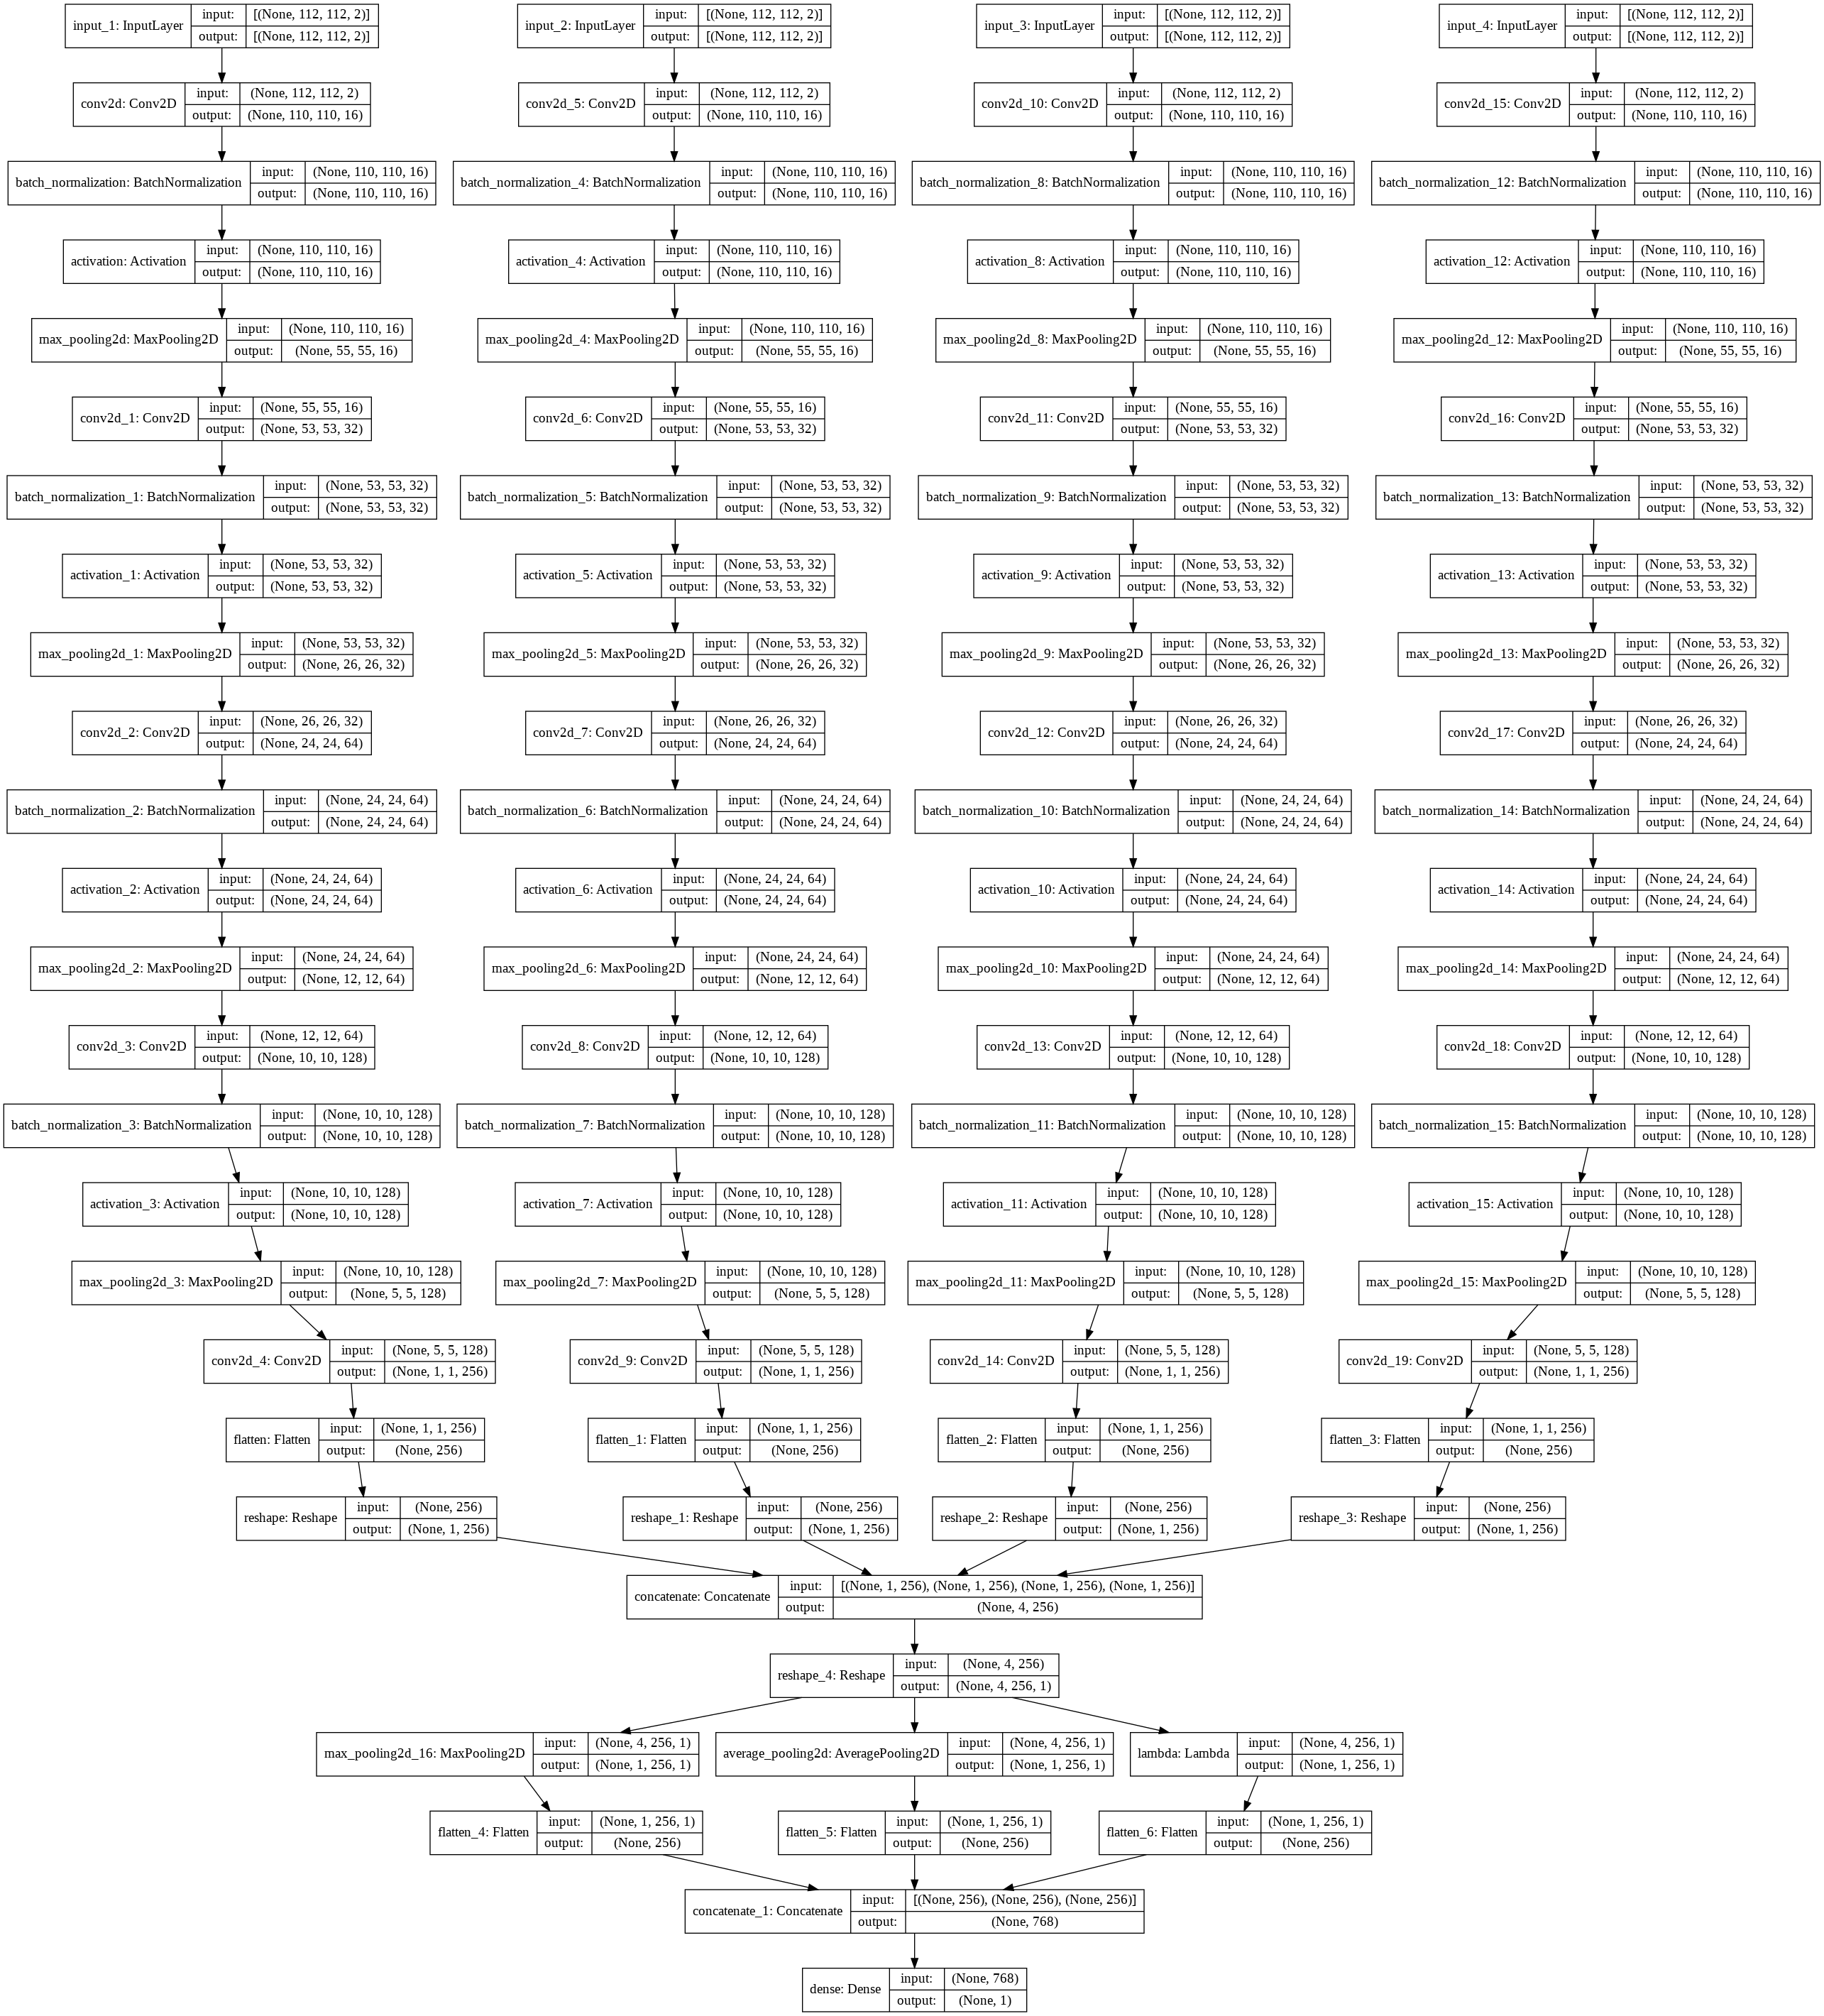

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
INIT_LR = 1e-3
BS = 8
EPOCHS = 20

In [ ]:
# opt = Adam(lr=INIT_LR)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
H = model.fit([X_train[:,0,...], X_train[:,1,...], X_train[:,2,...], X_train[:,3,...]], y_train, batch_size=BS,
	validation_split=0.2,
	epochs=EPOCHS)

Epoch 1/20
2450/2450 [==============================] - 63s 18ms/step - loss: 1.4800 - accuracy: 0.5720 - val_loss: 0.6264 - val_accuracy: 0.6384
Epoch 2/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.6156 - accuracy: 0.6594 - val_loss: 0.5451 - val_accuracy: 0.7120
Epoch 3/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.5364 - accuracy: 0.7263 - val_loss: 0.4722 - val_accuracy: 0.7767
Epoch 4/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.4550 - accuracy: 0.7864 - val_loss: 0.4286 - val_accuracy: 0.8029
Epoch 5/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.3556 - accuracy: 0.8388 - val_loss: 0.3650 - val_accuracy: 0.8373
Epoch 6/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.2631 - accuracy: 0.8861 - val_loss: 0.3118 - val_accuracy: 0.8698
Epoch 7/20
2450/2450 [==============================] - 37s 15ms/step - loss: 0.1845 - accuracy: 0.9265 - val_loss: 0.3052 -

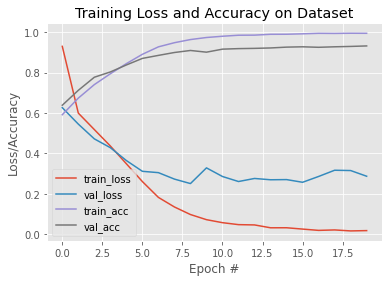

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
del X_train
del y_train

In [ ]:
with open('X_test_rose.pickle', 'rb') as handle:
  X_test = pickle.load(handle)

In [ ]:
with open('y_test_rose.pickle', 'rb') as handle:
  y_test = pickle.load(handle)

In [ ]:
model.evaluate([X_test[:,0,...], X_test[:,1,...], X_test[:,2,...], X_test[:,3,...]], y_test, batch_size=BS)

766/766 [==============================] - 5s 7ms/step - loss: 0.2531 - accuracy: 0.9386


[0.253086656332016, 0.9386122226715088]

In [ ]:
model.save('order_opF_v4_true.h5')

In [ ]:
!cp 'order_opF_v4_true.h5' '/content/drive/MyDrive/Anti Face Spoofing/'

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/order_opF_v4_true.h5' './'

In [ ]:
del X_test
del y_test

# Testing

In [ ]:
model = tf.keras.models.load_model('order_opF_v4_true.h5')

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/data_our_split.zip' './'

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/client.txt' './'

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/imposter.txt' './'

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/client_test.txt' './'

In [ ]:
!cp '/content/drive/MyDrive/Anti Face Spoofing/imposter_test.txt' './'

In [ ]:
!unzip data_our_split.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_365.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_370.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_376.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_381.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_387.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_392.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_398.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_402.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_408.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_413.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_419.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_424.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_02_03_43.jpg  
  inflating: data_our/imposter/0007_01_02_03/0007_01_

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
client_dataset = {}
for name in os.listdir('/content/data_our/client_test'):
    client_dataset[name] = []
for name in os.listdir('/content/data_our/client'):
    client_dataset[name] = []

# imagePaths = list(paths.list_images('/content/data_our/client'))
imagePaths = list(map(lambda x: x.rstrip(),open('client.txt').readlines()))
num_of_images = len(imagePaths)
for(i, data) in enumerate(imagePaths):
    print(data)
    print(f'Processing image {i}/{num_of_images}')
    label = data.split('/')[-2]
    img = dlib.load_rgb_image(data)
    dets = detector(img)
    for d in dets:
        shape = predictor(img, d)
        temp = dlib.get_face_chip(img, shape, size=INPUT_SIZE)
        client_dataset[label].append(temp)

Streaming output truncated to the last 5000 lines.
/content/data_our/client/0013/0013_01_07_03_460.jpg
Processing image 2390/4890
/content/data_our/client/0013/0013_01_07_03_461.jpg
Processing image 2391/4890
/content/data_our/client/0013/0013_01_07_03_462.jpg
Processing image 2392/4890
/content/data_our/client/0013/0013_01_07_03_463.jpg
Processing image 2393/4890
/content/data_our/client/0013/0013_01_07_03_464.jpg
Processing image 2394/4890
/content/data_our/client/0013/0013_01_07_03_465.jpg
Processing image 2395/4890
/content/data_our/client/0013/0013_01_07_03_466.jpg
Processing image 2396/4890
/content/data_our/client/0013/0013_01_07_03_467.jpg
Processing image 2397/4890
/content/data_our/client/0013/0013_01_07_03_468.jpg
Processing image 2398/4890
/content/data_our/client/0013/0013_01_07_03_469.jpg
Processing image 2399/4890
/content/data_our/client/0013/0013_01_07_03_470.jpg
Processing image 2400/4890
/content/data_our/client/0013/0013_01_07_03_471.jpg
Processing image 2401/4890
/

In [ ]:
del client_dataset['duc']
del client_dataset['hung']
del client_dataset['phuc']

In [ ]:
X_5 = []
X_10 = []
X_15 = []
X_20 = []
for (key, values) in client_dataset.items():
  for i in range(len(values)):
    if len(values) < 20:
      print('Not valid')
    if i + 19 > len(values) - 1 :
      break
    else:
      old = values[i][...,::-1]
      new_5 = values[i+4][...,::-1]
      new_10 = values[i+9][...,::-1]
      new_15 = values[i+14][...,::-1]
      new_20 = values[i+19][...,::-1]
      # print(old.shape)
      old_flip = cv2.flip(old, 1)
      new_5_flip = cv2.flip(new_5, 1)
      new_10_flip = cv2.flip(new_10, 1)
      new_15_flip = cv2.flip(new_15, 1)
      new_20_flip = cv2.flip(new_20, 1)
      old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
      old_flip_gray = cv2.cvtColor(old_flip, cv2.COLOR_BGR2GRAY)
      new_5_gray = cv2.cvtColor(new_5, cv2.COLOR_BGR2GRAY)
      new_5_flip_gray = cv2.cvtColor(new_5_flip, cv2.COLOR_BGR2GRAY)
      new_10_gray = cv2.cvtColor(new_10, cv2.COLOR_BGR2GRAY)
      new_10_flip_gray = cv2.cvtColor(new_10_flip, cv2.COLOR_BGR2GRAY)
      new_15_gray = cv2.cvtColor(new_15, cv2.COLOR_BGR2GRAY)
      new_15_flip_gray = cv2.cvtColor(new_15_flip, cv2.COLOR_BGR2GRAY)
      new_20_gray = cv2.cvtColor(new_20, cv2.COLOR_BGR2GRAY)
      new_20_flip_gray = cv2.cvtColor(new_20_flip, cv2.COLOR_BGR2GRAY)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_5_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_5_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_10_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_10_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_15_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_15_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_20_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_20_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20.append(flow)

In [ ]:
del client_dataset

In [ ]:
X_5 = np.array(X_5)
X_10 = np.array(X_10)
X_15 = np.array(X_15)
X_20 = np.array(X_20)
X_5.shape, X_10.shape, X_15.shape, X_20.shape

((8282, 112, 112, 2),
 (8282, 112, 112, 2),
 (8282, 112, 112, 2),
 (8282, 112, 112, 2))

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
imposter_dataset = {}
for name in os.listdir('/content/data_our/imposter_test'):
    imposter_dataset[name] = []
for name in os.listdir('/content/data_our/imposter'):
    imposter_dataset[name] = []

# imagePaths = list(paths.list_images('/content/data_our/imposter'))
imagePaths = list(map(lambda x: x.rstrip(),open('imposter.txt').readlines()))
num_of_images = len(imagePaths)
for(i, data) in enumerate(imagePaths):
    print(data)
    print(f'Processing image {i}/{num_of_images}')
    label = data.split('/')[-2]
    img = dlib.load_rgb_image(data)
    dets = detector(img)
    for d in dets:
        shape = predictor(img, d)
        temp = dlib.get_face_chip(img, shape, size=INPUT_SIZE)
        imposter_dataset[label].append(temp)

Streaming output truncated to the last 5000 lines.
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_90.jpg
Processing image 5391/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_95.jpg
Processing image 5392/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_103.jpg
Processing image 5393/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_108.jpg
Processing image 5394/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_112.jpg
Processing image 5395/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_117.jpg
Processing image 5396/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_121.jpg
Processing image 5397/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_126.jpg
Processing image 5398/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_130.jpg
Processing image 5399/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04_03_135.jpg
Processing image 5400/7891
/content/data_our/imposter/0014_01_04_03/0014_01_04

In [ ]:
del imposter_dataset['duc']
del imposter_dataset['hung']
del imposter_dataset['phuc']

In [ ]:
X_5_imposter = []
X_10_imposter = []
X_15_imposter = []
X_20_imposter = []
for (key, values) in imposter_dataset.items():
  for i in range(len(values)):
    if len(values) < 20:
      print('Not valid')
    if i + 19 > len(values) - 1 :
      break
    else:
      old = values[i][...,::-1]
      new_5 = values[i+4][...,::-1]
      new_10 = values[i+9][...,::-1]
      new_15 = values[i+14][...,::-1]
      new_20 = values[i+19][...,::-1]
      # print(old.shape)
      old_flip = cv2.flip(old, 1)
      new_5_flip = cv2.flip(new_5, 1)
      new_10_flip = cv2.flip(new_10, 1)
      new_15_flip = cv2.flip(new_15, 1)
      new_20_flip = cv2.flip(new_20, 1)
      old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
      old_flip_gray = cv2.cvtColor(old_flip, cv2.COLOR_BGR2GRAY)
      new_5_gray = cv2.cvtColor(new_5, cv2.COLOR_BGR2GRAY)
      new_5_flip_gray = cv2.cvtColor(new_5_flip, cv2.COLOR_BGR2GRAY)
      new_10_gray = cv2.cvtColor(new_10, cv2.COLOR_BGR2GRAY)
      new_10_flip_gray = cv2.cvtColor(new_10_flip, cv2.COLOR_BGR2GRAY)
      new_15_gray = cv2.cvtColor(new_15, cv2.COLOR_BGR2GRAY)
      new_15_flip_gray = cv2.cvtColor(new_15_flip, cv2.COLOR_BGR2GRAY)
      new_20_gray = cv2.cvtColor(new_20, cv2.COLOR_BGR2GRAY)
      new_20_flip_gray = cv2.cvtColor(new_20_flip, cv2.COLOR_BGR2GRAY)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_5_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_5_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_5_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_10_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_10_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_10_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_15_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_15_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_15_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_gray, new_20_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20_imposter.append(flow)
      flow = cv2.calcOpticalFlowFarneback(old_flip_gray, new_20_flip_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
      X_20_imposter.append(flow)

Not valid


In [ ]:
del imposter_dataset

In [ ]:
X_5_imposter = np.array(X_5_imposter)
X_10_imposter = np.array(X_10_imposter)
X_15_imposter = np.array(X_15_imposter)
X_20_imposter = np.array(X_20_imposter)
X_5_imposter.shape, X_10_imposter.shape, X_15_imposter.shape, X_20_imposter.shape

((10220, 112, 112, 2),
 (10220, 112, 112, 2),
 (10220, 112, 112, 2),
 (10220, 112, 112, 2))

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
X = np.array(list(zip(X_5_total, X_10_total, X_15_total, X_20_total)))
X.shape

(18502, 4, 112, 112, 2)

In [ ]:
y.shape

(18502,)

In [ ]:
del X_5_total
del X_10_total
del X_15_total
del X_20_total

In [ ]:
model.evaluate([X[:,0,...], X[:,1,...], X[:,2,...], X[:,3,...]], y)

579/579 [==============================] - 21s 10ms/step - loss: 2.7403 - accuracy: 0.5394


[2.7403388023376465, 0.5394011735916138]

In [ ]:
X[0,1,...].shape

(112, 112, 2)

In [ ]:
model.predict([X[0,0,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[0,1,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[0,2,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[0,3,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2)]).flatten()

array([0.02606765], dtype=float32)

In [ ]:
y[0]

0

In [ ]:
y_pred = []
for _ in range(X.shape[0]):
  pred = model.predict([X[_,0,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[_,1,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[_,2,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X[_,3,...].reshape(1, INPUT_SIZE, INPUT_SIZE, 2)]).flatten()[0]
  if pred > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4886    0.6248    0.5484      8282
           1     0.6072    0.4700    0.5298     10220

    accuracy                         0.5393     18502
   macro avg     0.5479    0.5474    0.5391     18502
weighted avg     0.5541    0.5393    0.5381     18502



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
CM = confusion_matrix(y, y_pred)

In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [ ]:
APCER = FP / (TN + FP)
BPCER = FN / (TP + FN)

In [ ]:
APCER, BPCER

(0.37515092972711905, 0.5300391389432485)

In [ ]:
(APCER + BPCER) / 2

0.4525950343351838